# Classifying whether a customer will purchas a product.

### Bank Marketing Data Set



<b>Abstract:</b> The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


The classification <b>goal</b> is to predict if the client will subscribe (yes/no) a term deposit (variable y).

#### Loading Packages
Libraries Below will be used to analyse bank data

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import plotly.graph_objs as go
import plotly.tools as tools
import plotly.offline as ply
ply.init_notebook_mode(connected=True)
import seaborn as sns 
color = sns.color_palette()
import matplotlib.pyplot as plt
%matplotlib inline
# Any results you write to the current directory are saved as output.

In [30]:
#register plotly api
import plotly 
plotly.tools.set_credentials_file(username='msamido', api_key='XI1JeYJuH66UOkDyvIjs')

#### Loading bank.csv Data
> Lets See first few Lines

In [12]:
#df = pd.read_csv('../data/bank.csv', sep=';')
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


#### summary
<ul>
<li> The <b>average age</b> of people in our dataset is <b>40.93</b></li>
<li> The <b>average balance</b> of people in our dataset is <b>1362.27</b></li>
</ul>

#### The proportions of Maital status

In [16]:
df["marital"].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [32]:
X=df.marital.value_counts()
trace = go.Pie(labels=X.index, values=X.values)
ply.iplot([trace], filename='basic_pie_chart')

In [33]:
#distribution of marital status vs balance

data = [go.Bar(
            x=df.marital.value_counts().index,
            y=df.balance.value_counts().values
    )]

ply.iplot(data, filename='basic-bar')

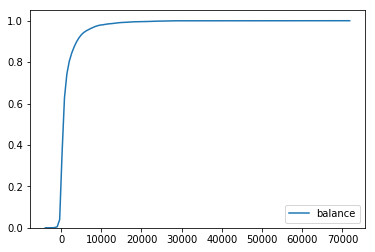

In [20]:
sns.kdeplot(df.balance, cumulative=True)
plt.show()

In [21]:
X=df.contact.value_counts()
trace = go.Pie(labels=X.index, values=X.values)
ply.iplot([trace], filename='basic_pie_chart')

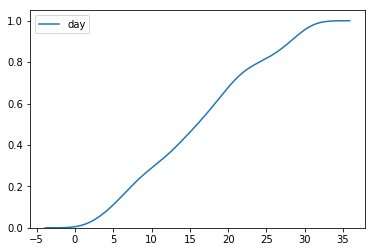

In [22]:
sns.kdeplot(df.day, cumulative=True)
plt.show()

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [61]:
Y=df.age.value_counts().index[::-1]
X=df.age.value_counts().values[::-1]

data = go.Bar(
    x = X,
    y = Y,
    orientation = 'h',
    marker=dict(
        color=X,
        colorscale = 'Jet',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Balances for Account Holders',
    width=600,
    height=1000,
    )
fig = go.Figure(data=[data], layout=layout)
ply.iplot(fig, filename="Bank")

#### Converting the data into numeric values for training the model
> <ul><li>Contact method</li>
> <li>Marital type</li>
> <li>Job type</li>
> <li>Education type</li>
> <li>POutcome type</li>
> <li>Default type</li>
> <li>Month type</li>
> <li>House type</li>
> <li>Loan type</li></ul>

In [37]:
df[df.marital=='divorced'].education.value_counts().index

Index(['secondary', 'tertiary', 'primary', 'unknown'], dtype='object')

In [38]:
contact_type = {j:i for i,j in enumerate(pd.unique(df.contact))}
df.contact = df.contact.map(contact_type)

In [39]:
marital_type = {j:i for i,j in enumerate(pd.unique(df.marital))}
df.marital = df.marital.map(marital_type)

In [40]:
X=df.job.value_counts()
trace = go.Pie(labels=X.index, values=X.values)
ply.iplot([trace], filename='basic_pie_chart')

In [41]:
job_type = {j:i for i,j in enumerate(pd.unique(df.job))}
df.job = df.job.map(job_type)

In [42]:
education_type = {j:i for i,j in enumerate(pd.unique(df.education))}
df.education = df.education.map(education_type)

In [43]:
poutcome_type = {j:i for i,j in enumerate(pd.unique(df.poutcome))}
df.poutcome = df.poutcome.map(poutcome_type)

In [44]:
default_type = {j:i for i,j in enumerate(pd.unique(df.default))}
df.default = df.default.map(default_type)

In [45]:
month_type = {j:i+1 for i,j in enumerate(pd.unique(df.month))}
df.month = df.month.map(month_type)

In [46]:
loan_type = {j:i for i,j in enumerate(pd.unique(df.loan))}
df.loan = df.loan.map(loan_type)

In [47]:
house_type = {j:i for i,j in enumerate(pd.unique(df.housing))}
df.housing = df.housing.map(house_type)

In [65]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,0,0,0,1787,0,0,0,19,1,79,1,-1,0,0,no
1,33,1,0,1,0,4789,1,1,0,11,2,220,1,339,4,1,no
2,35,2,1,2,0,1350,1,0,0,16,3,185,1,330,1,1,no
3,30,2,0,2,0,1476,1,1,1,3,4,199,4,-1,0,0,no
4,59,3,0,1,0,0,1,0,1,5,2,226,1,-1,0,0,no
5,35,2,1,2,0,747,0,0,0,23,5,141,2,176,3,1,no
6,36,4,0,2,0,307,1,0,0,14,2,341,1,330,2,2,no
7,39,5,0,1,0,147,1,0,0,6,2,151,2,-1,0,0,no
8,41,6,0,2,0,221,1,0,1,14,2,57,2,-1,0,0,no
9,43,1,0,0,0,-88,1,1,0,17,3,313,1,147,2,1,no


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.y, test_size=0.4) 

In [51]:
clf = DecisionTreeClassifier(max_depth=3)

In [52]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, classification_report

In [54]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         no       0.90      0.98      0.94      1587
        yes       0.65      0.25      0.36       222

avg / total       0.87      0.89      0.87      1809



In [55]:
print(clf.feature_importances_)
print(X_train.columns)

[ 0.          0.          0.05095654  0.          0.01749657  0.
  0.02157442  0.          0.          0.02898271  0.          0.56412932
  0.          0.          0.          0.31686044]
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [56]:
print(accuracy_score(y_test, y_pred))

0.891652846877


In [57]:
from sklearn.tree import export_graphviz
from sklearn import tree

In [58]:
# clf = RandomForestClassifier(max_depth=5, max_leaf_nodes=5)
# clf = clf.fit(X_train, y_train)
tree.export_graphviz(clf, out_file='tree.dot')

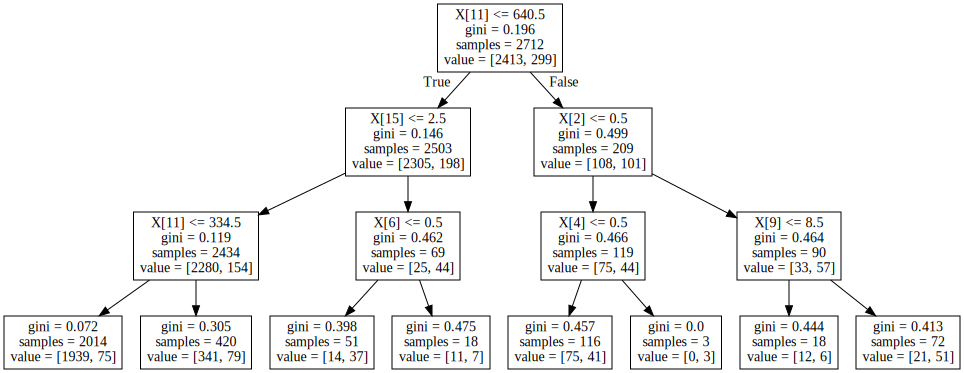

In [59]:
import graphviz
with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)